In [13]:
import polars as pl
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import sys
work_path = Path(next((p for p in Path("__file__").resolve().parents if p.name == "Research"), None))
torchlib_path = str(work_path / Path("app/torch_libs"))
sys.path.append(torchlib_path)

from run_manager import RunManager, RunsManager, RunViewer


In [14]:
nb_path = Path().resolve()
# rm = RunManager(exp_path=nb_path)
# rm.ref_stats()
rv = RunViewer(exp_path=nb_path)
df_base = rv.fetch_results(met_listed=False)

pass


In [15]:
df_res = df_base

cols = ["train_dataset", "train_num"]

df_uq = df_res.unique(cols, maintain_order=True).select(cols)

df_res_mf = None

for cond in df_uq.iter_rows(named=True):
    df_cond = df_res
    for k, v in cond.items():
        df_cond = df_cond.filter(pl.col(k) == v)
    
    max_fil = df_cond["fils"].max()
    # min_fil = df_cond["fils"].min()
    max_fil_vacc = df_cond.filter(pl.col("fils") == max_fil)["val_acc"].mean()
    
    df_cond = df_cond.with_columns(pl.lit(max_fil_vacc).alias("val_acc_mf"))
    
    if df_res_mf is None:
        df_res_mf = df_cond
    else:
        df_res_mf = pl.concat([df_res_mf, df_cond], how="vertical")
        
df_res_mf = df_res_mf.with_columns((1 - pl.col("val_acc")).alias("val_error"))

df_res_mf = df_res_mf.with_columns((pl.col("val_acc") - pl.col("val_acc_mf")).alias("mf_diff"))
# df_res_mf = df_res_mf.with_columns((pl.col("val_acc_mf") - pl.col("val_acc")).alias("mf_error_diff"))
# df_res_mf = df_res_mf.with_columns((pl.col("val_acc") / pl.col("val_acc_mf")).alias("mf_diff") - 1)
# df_res_mf = df_res_mf.with_columns((pl.col("mf_error_diff") / pl.col("val_error")).alias("error_raise_rate"))

df_res_mf = df_res_mf.filter(pl.col("fils") == 1)

df_res_f1_b = df_res_mf

df_res_mf = df_res_mf.filter(pl.col("train_dataset") == "tiny-imagenet_train")
# df_res_mf = df_res_mf.filter(pl.col("train_num") == 1000)
df_res_mf = df_res_mf.sort("val_acc", descending=True)



    
df_disp = df_res.filter(pl.col("train_dataset").str.slice(0, 5) == "cifar")
display(df_disp)





/tmp/ipykernel_309499/2711627220.py:12: UserWarning: Comparisons with None always result in null. Consider using `.is_null()` or `.is_not_null()`.
  df_cond = df_cond.filter(pl.col(k) == v)
/tmp/ipykernel_309499/2711627220.py:16: UserWarning: Comparisons with None always result in null. Consider using `.is_null()` or `.is_not_null()`.
  max_fil_vacc = df_cond.filter(pl.col("fils") == max_fil)["val_acc"].mean()


run_id,model_arc,train_dataset,val_dataset,num_classes,train_trans,val_trans,train_num,val_num,epochs,max_lr,batch_size,iters/epoch,base_fils,fils,ensembles,params,loss_func,optimizer,scheduler,step,lr,epoch,train_loss,train_acc,val_loss,val_acc
i64,str,str,str,i64,str,str,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,str,str,str,i64,f64,i64,f64,f64,f64,f64
48,"""models.gitresnet_ee resnet18""","""cifar10_train""","""cifar10_val""",10,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",500,10000,2000,0.0005,128,4,32,1,1024,3062784,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",2000,3.0843e-10,2000,0.001493,1.0,0.310213,0.4529
49,"""models.gitresnet_ee resnet18""","""cifar10_train""","""cifar10_val""",10,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",500,10000,2000,0.0005,128,4,32,2,256,2923520,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",2000,3.0843e-10,2000,0.000176,1.0,0.357937,0.4356
50,"""models.gitresnet_ee resnet18""","""cifar10_train""","""cifar10_val""",10,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",500,10000,2000,0.0005,128,4,32,4,64,2855808,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",2000,3.0843e-10,2000,0.000072,1.0,0.487452,0.39
51,"""models.gitresnet_ee resnet18""","""cifar10_train""","""cifar10_val""",10,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",500,10000,2000,0.0005,128,4,32,8,16,2822432,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",2000,3.0843e-10,2000,0.000033,1.0,0.628107,0.3645
52,"""models.gitresnet_ee resnet18""","""cifar10_train""","""cifar10_val""",10,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",500,10000,2000,0.0005,128,4,32,16,4,2805864,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",2000,3.0843e-10,2000,0.000046,1.0,0.708342,0.3473
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
127,"""models.gitresnet_ee resnet18""","""cifar100_train""","""cifar100_val""",10,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",5000,1000,200,0.0005,128,40,32,2,256,2923520,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",200,3.0842e-8,200,0.044562,0.9358,0.086899,0.818
128,"""models.gitresnet_ee resnet18""","""cifar100_train""","""cifar100_val""",10,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",5000,1000,200,0.0005,128,40,32,4,64,2855808,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",200,3.0842e-8,200,0.033633,0.947,0.094296,0.814
129,"""models.gitresnet_ee resnet18""","""cifar100_train""","""cifar100_val""",10,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",5000,1000,200,0.0005,128,40,32,8,16,2822432,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 20…",200,3.0842e-8,200,0.026073,0.9604,0.104435,0.803


[[ 1.         -0.71003146]
 [-0.71003146  1.        ]]


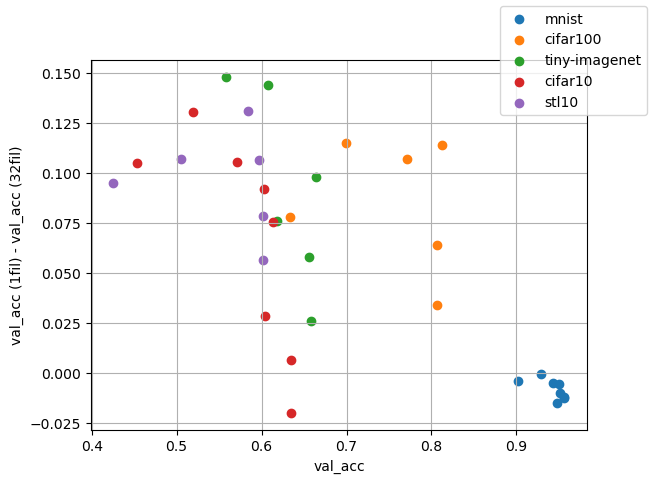

In [16]:
df_res_f1 = df_res_f1_b.sort("val_error")
# df_res_f1 = df_res_f1.filter(pl.col("train_dataset") == "mnist_train")
# df_res_f1 = df_res_f1.filter(pl.col("train_dataset") == "stl10_train")
# df_res_f1 = df_res_f1.filter(pl.col("train_num") == 1000)
# x = df_res_f1["val_acc_mf"]
# y = df_res_f1["mf_diff"]

fig, ax = plt.subplots()

# ext_col = "train_num"
ext_col = "train_dataset"
x_col = "val_acc"
y_col = "mf_diff"

x_a = None
y_a = None

for ds in df_res_f1[ext_col].unique(maintain_order=True):
    df_res_ft = df_res_f1.filter(pl.col(ext_col) == ds)
    x = df_res_ft[x_col]
    y = df_res_ft[y_col]
    
    if x_a is None:
        x_a = x
    else:
        x_a.append(x)
    if y_a is None:
        y_a = y
    else:
        y_a.append(y)

    ax.scatter(x, y, label=ds[:-6])

ax.set_xlabel("val_acc")
ax.set_ylabel("val_acc (1fil) - val_acc (32fil)")
ax.grid()

# DS数示す
fig.legend()
fig.show()

print(np.corrcoef(x_a, y_a))


